## Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-feature.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

## Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

# Token probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Calculating the Joint Probability

### The Dot Product

In [5]:
a = np.array([1,2,3])
b = np.array([0,5,4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [6]:
a.dot(b)

22

In [7]:
1*0 + 2*5 + 3*4

22

In [8]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('Shape of c is', c.shape)
print(c)

Shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [9]:
print(a.dot(c))
print('Shape of dot product is', a.dot(c).shape)

[21  9]
Shape of dot product is (2,)


In [10]:
X_test.shape

(1724, 2500)

In [11]:
prob_token_spam.shape

(2500,)

In [12]:
print('Shape of dot product is', X_test.dot(prob_token_spam).shape)

Shape of dot product is (1724,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [17]:
PROB_SPAM = 0.3116
PROB_HAM = 1 - PROB_SPAM

In [18]:
np.log(prob_token_spam)

array([-4.42147148, -5.26555906, -5.0005684 , ..., -9.80458944,
       -9.62226789, -9.21680278])

## Joint probability in log format

In [19]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [20]:
joint_log_spam[:5]

array([22.33592563,  1.96010191, 17.80251413, 18.20771333, 19.52044099])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1 - P(Spam))} {P(X)}$$

In [21]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(PROB_HAM)

In [22]:
joint_log_ham[:5]

array([-58.92961631, -10.85232723, -34.74870535, -59.01385325,
       -53.0736597 ])

In [23]:
joint_log_spam.shape

(1724,)

## Making Predictions

## Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>
<center><b>OR</b></center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [89]:
prediction = joint_log_spam > joint_log_ham

numpy.ndarray

In [25]:
prediction[-5:]

array([ True, False, False, False, False])

In [27]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplification

$$P(X \, | \, Spam) \, P(Spam) ≠ \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [28]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(PROB_HAM)

## Metrics and Evaluation

### Accuracy

In [32]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly:', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly:', numdocs_wrong)

Docs classified correctly: 1685
Docs classified incorrectly: 39


In [33]:
## Accuracy
correct_docs / len(X_test)

0.9773781902552204

In [35]:
fraction_wrong = numdocs_wrong / len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1 - fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


## Visualizing the Results

In [46]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

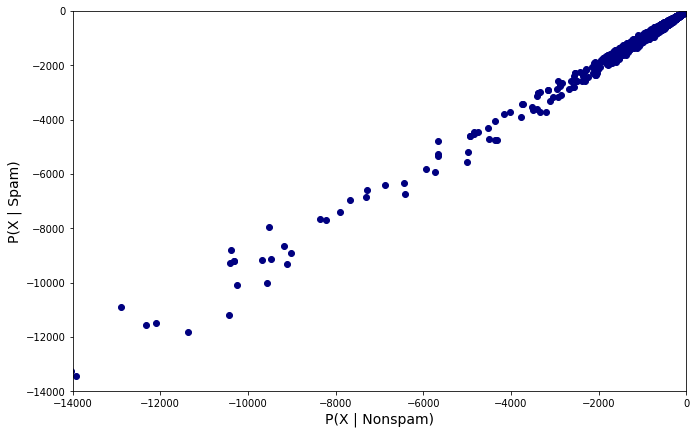

In [47]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')

plt.show()

## The Decision Boundary

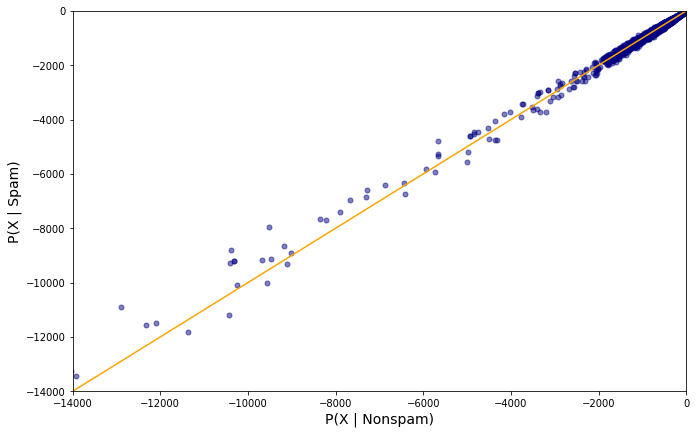

In [48]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

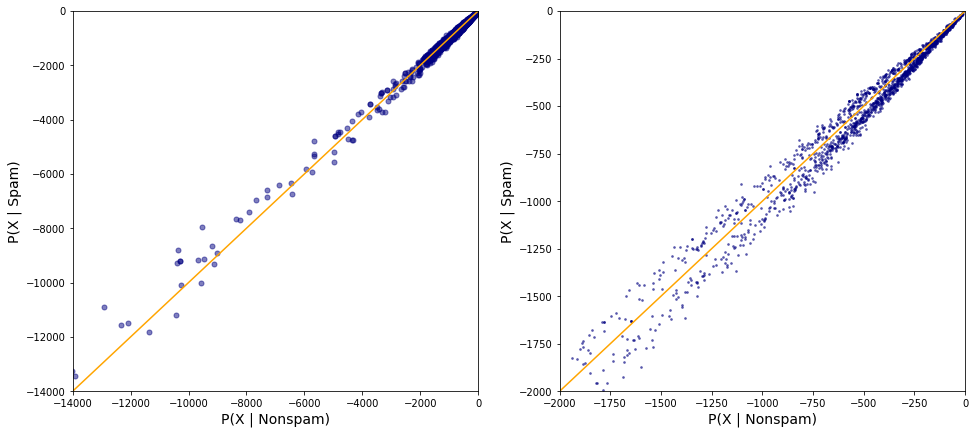

In [49]:
plt.figure(figsize=(16,7))

# Chart no 1
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart no 2
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [50]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,
                          labels: y_test})

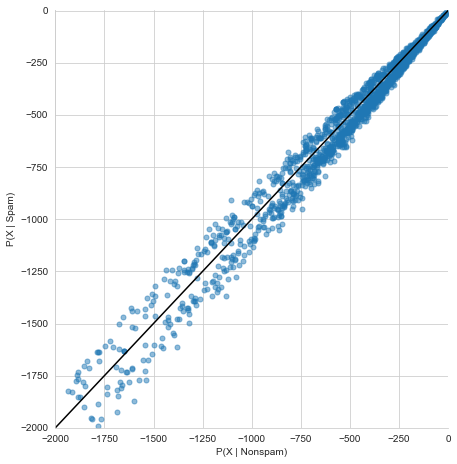

In [57]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.show()

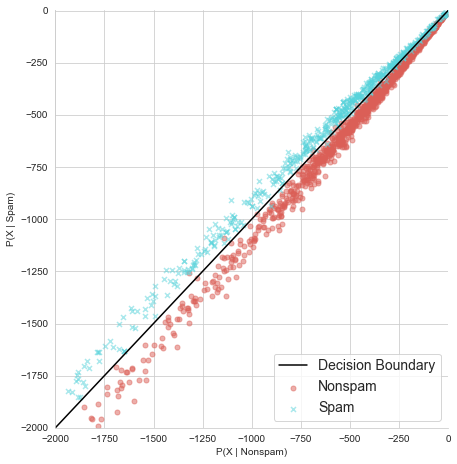

In [65]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

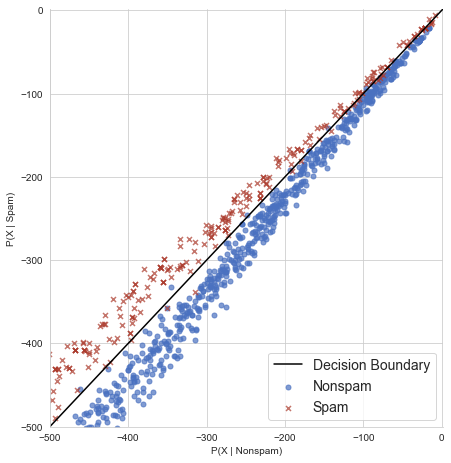

In [72]:
my_colors = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colors)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

## False Positives and False Negatives

In [73]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1138,  586], dtype=int64))

In [74]:
true_pos = (y_test == 1) & (prediction == 1)
true_pos

array([ True,  True,  True, ..., False, False, False])

In [75]:
true_pos.sum()

568

In [82]:
# Case where email is nonspam, but model predicts it to be spam
false_pos = (y_test == 0) & (prediction == 1)
false_pos

array([False, False, False, ..., False, False, False])

In [80]:
false_pos.sum()

18

In [83]:
# Case where email is spam, but model predicts it to be nonspam
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

21

## Recall Score

$$ Recall \, Score = \frac{True \, Positives}{True \, Positives + False \, Negatives}$$

In [85]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score: {:.2%}'.format(recall_score))

Recall score: 96.43%


## Precision Score

$$ Precision = \frac{True \, Positives}{True \, Positives + False \, Positives}$$

In [87]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score: {:.3}'.format(precision_score))

Precision score: 0.969


## F-Score or F1 Score

$$F Score = 2 * \frac{Precision * Recall}{Precision + Recall}$$

In [88]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
